# Şirket Çalışan Verisi Analizi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## Veri Setini Yükleme

In [2]:
df = pd.read_csv('sirket_calisan_verisi_5000.csv')
df.head()

,Çalışan ID,Ad,Soyad,E-posta,Telefon Numarası,Departman,Pozisyon,Maaş,İşe Başlama Tarihi,Cinsiyet,Doğum Tarihi,Şehir
0,EMP_00001,Aysevim,Duran,aysevim.duran@gul.net,555 123 45 67,Donanım Mühendisliği,Takım Lideri,45681.0,2019-05-13,Kadın,1982-04-13,Arsoymouth
1,EMP_00002,Semender,Yaman,semender.yaman@eren.net,(555) 987-6543,Üretim,Analist,22067.0,2017-08-10,Erkek,1977-09-04,Çamurcuoğlumouth
2,EMP_00003,Özel,Dumanlı,DENEME@Sirket.com,234 4 135,Satış,Uzman,22839.0,2022-01-08,Kadın,1973-10-10,New Güllühan
3,EMP_00004,Eröz,Zorlu,eröz.zorlu@sener.com,+90(925)8404299,Finans,Kıdemli Mühendis,20000 TL,2019-08-12,Erkek,1970-06-16,Adasalshire
4,EMP_00005,Goncafer,Duran,goncafer.duran@safak.tr,+90(324)9047526,Müşteri Hizmetleri,Direktör,500,2021-06-19,Erkek,1998-07-15,East Süheydamouth


## Veri Temizleme

In [3]:
df['Maaş'] = df['Maaş'].astype(str).str.replace(' TL', '', regex=False)
df['Maaş'] = pd.to_numeric(df['Maaş'], errors='coerce')
df['Doğum Tarihi'] = pd.to_datetime(df['Doğum Tarihi'], errors='coerce').dt.date
df.dropna(subset=['Maaş', 'Doğum Tarihi'], inplace=True)

## Burç Hesaplama

In [4]:
def get_zodiac_sign(day, month):
    if (month == 3 and day >= 21) or (month == 4 and day <= 19):
        return 'Koç'
    elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
        return 'Boğa'
    elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
        return 'İkizler'
    elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
        return 'Yengeç'
    elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
        return 'Aslan'
    elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
        return 'Başak'
    elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
        return 'Terazi'
    elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
        return 'Akrep'
    elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
        return 'Yay'
    elif (month == 12 and day >= 22) or (month == 1 and day <= 19):
        return 'Oğlak'
    elif (month == 1 and day >= 20) or (month == 2 and day <= 18):
        return 'Kova'
    elif (month == 2 and day >= 19) or (month == 3 and day <= 20):
        return 'Balık'

df['Burç'] = df['Doğum Tarihi'].apply(lambda x: get_zodiac_sign(x.day, x.month))
df.head()

,Çalışan ID,Ad,Soyad,E-posta,Telefon Numarası,Departman,Pozisyon,Maaş,İşe Başlama Tarihi,Cinsiyet,Doğum Tarihi,Şehir,Burç
0,EMP_00001,Aysevim,Duran,aysevim.duran@gul.net,555 123 45 67,Donanım Mühendisliği,Takım Lideri,45681.0,2019-05-13,Kadın,1982-04-13,Arsoymouth,Koç
1,EMP_00002,Semender,Yaman,semender.yaman@eren.net,(555) 987-6543,Üretim,Analist,22067.0,2017-08-10,Erkek,1977-09-04,Çamurcuoğlumouth,Başak
2,EMP_00003,Özel,Dumanlı,DENEME@Sirket.com,234 4 135,Satış,Uzman,22839.0,2022-01-08,Kadın,1973-10-10,New Güllühan,Terazi
3,EMP_00004,Eröz,Zorlu,eröz.zorlu@sener.com,+90(925)8404299,Finans,Kıdemli Mühendis,20000.0,2019-08-12,Erkek,1970-06-16,Adasalshire,İkizler
4,EMP_00005,Goncafer,Duran,goncafer.duran@safak.tr,+90(324)9047526,Müşteri Hizmetleri,Direktör,500.0,2021-06-19,Erkek,1998-07-15,East Süheydamouth,Yengeç


## Veri Görselleştirme

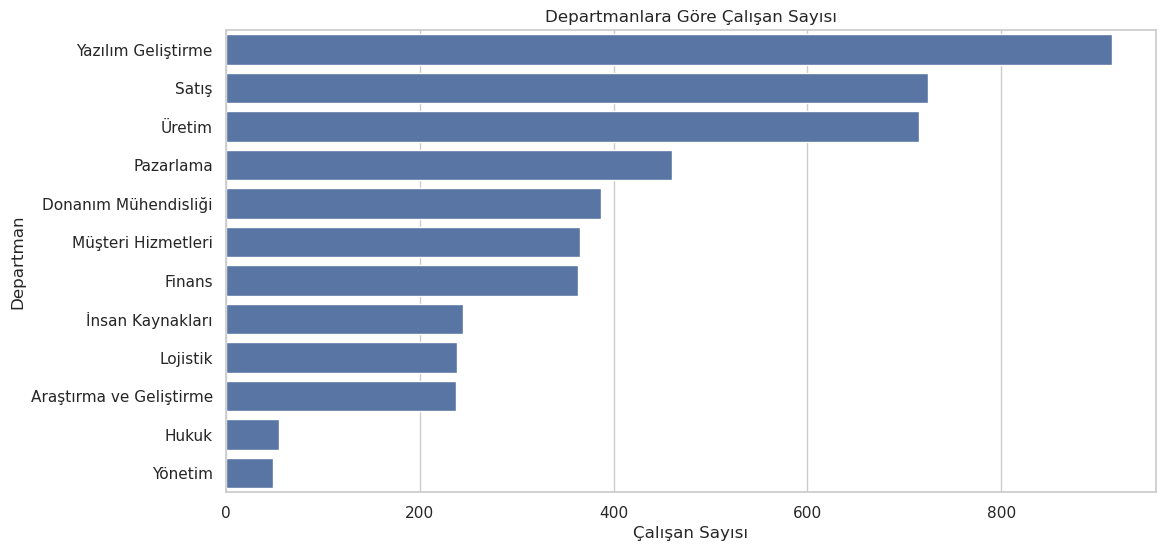

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Departman', data=df, order = df['Departman'].value_counts().index)
plt.title('Departmanlara Göre Çalışan Sayısı')
plt.xlabel('Çalışan Sayısı')
plt.ylabel('Departman')
plt.show()

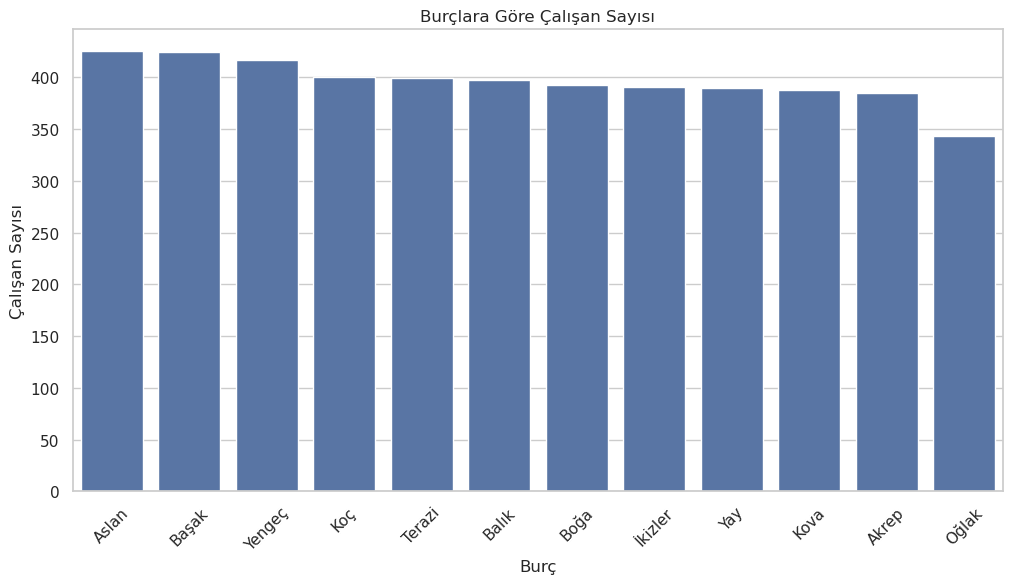

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Burç', data=df, order = df['Burç'].value_counts().index)
plt.title('Burçlara Göre Çalışan Sayısı')
plt.xlabel('Burç')
plt.ylabel('Çalışan Sayısı')
plt.xticks(rotation=45)
plt.show()

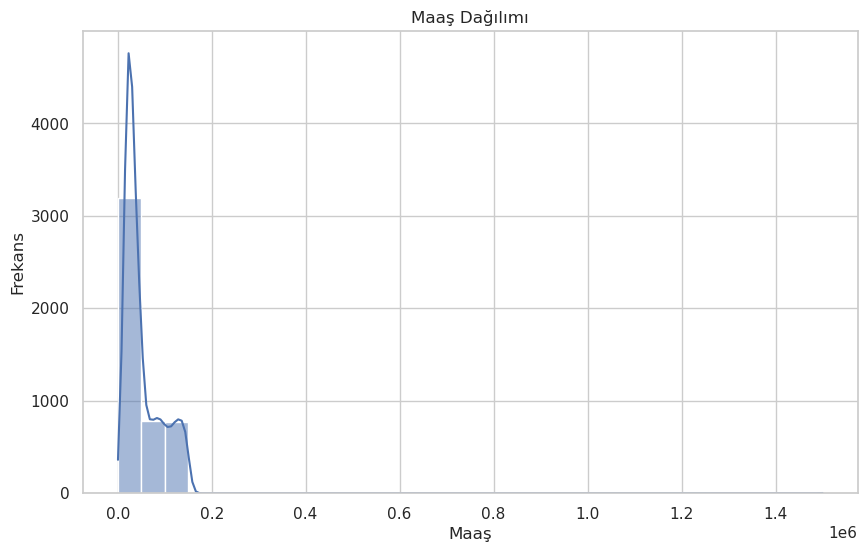

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Maaş'], bins=30, kde=True)
plt.title('Maaş Dağılımı')
plt.xlabel('Maaş')
plt.ylabel('Frekans')
plt.show()

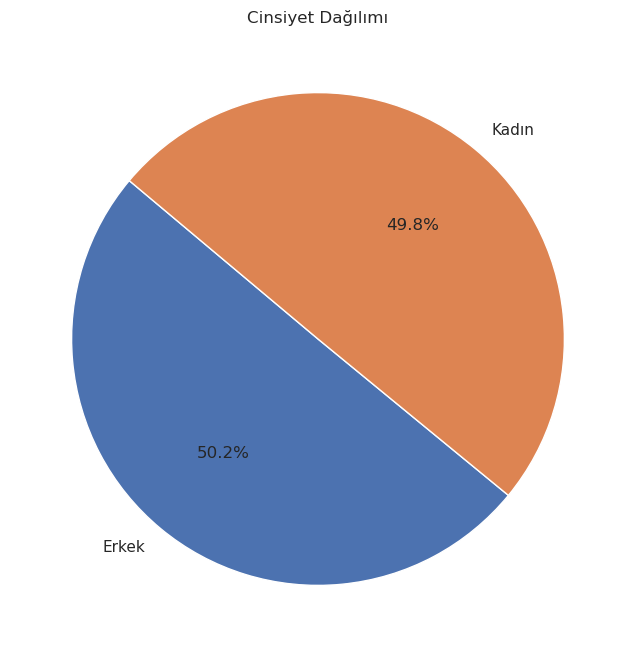

In [8]:
gender_counts = df['Cinsiyet'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cinsiyet Dağılımı')
plt.ylabel('')
plt.show()

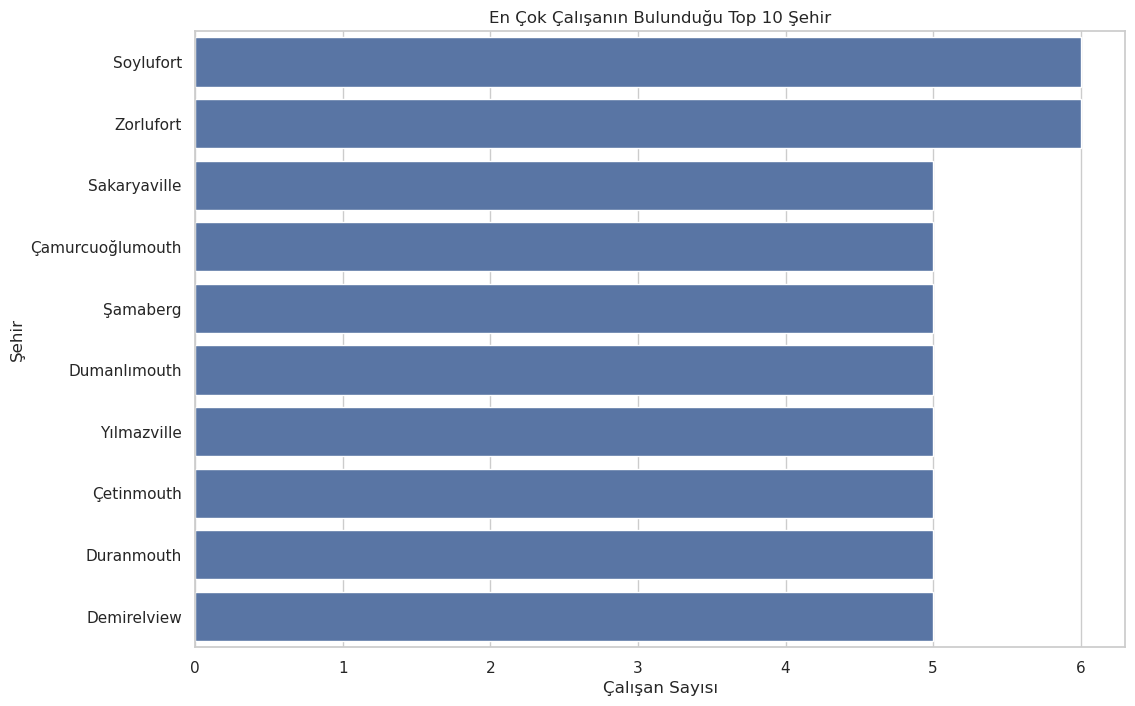

In [9]:
plt.figure(figsize=(12, 8))
top_10_cities = df['Şehir'].value_counts().nlargest(10)
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.title('En Çok Çalışanın Bulunduğu Top 10 Şehir')
plt.xlabel('Çalışan Sayısı')
plt.ylabel('Şehir')
plt.show()